# Calculate the thermal relaxation timescale:

- number of particles per unit area in a column: 
$$ N = \int^{p1}_{p2} \frac{1}{g M_{mean}} = \frac{p1-p2}{g * M_{mean}} $$

- $c_m$ ($J/kg/K$): heat capacity per unit mass of species at a given temperature $T_{eff}$

- The total heat capacity per unit area is
$$ C = N c = \frac{(p_1 - p_2) c_m} {g}  $$

- The relaxation timescale is determined by timescale for all particles to radiate excess heat away. The linear Boltzmann law for small temperature changes is: 

$$ \tau = \frac{C}{dL/dT} = \frac{C}{4 \sigma T_{eff}^3 } = \frac{(p_1 - p_2) c_m}{4 \sigma T_{eff}^3 g} $$ 

### Using a simple Isothermal Profile 

In [41]:
import numpy as np
import astropy.constants as c
import astropy.units as u
import matplotlib.pyplot as plt

In [ ]:
def tau_relaxation(g, Teff, delta_p, cm):
    return delta_p * cm / (g * 4 * c.sigma_sb * Teff **3 )

### Assuming an isothermal profile

# example L type brown dwarf
M = 30 * u.M_jup
R = 0.85 * u.R_jup

# gravity
g = c.G * M / R**2
Teff = 1200 * u.K

# cloud pressure level

# specific heat capacity for H2 at 1200K
cm = 15.3 * 1e3 * u.J / (u.kg * u.K)
print("gravity:", g.cgs)
print("heat capacity cm (H2 at 1200K):", cm)
print('effective temperature (assume isothermal profile): ', Teff)

for delta_p in [0.01, 0.1, 1, 10]:

    t = tau_relaxation(g, Teff, delta_p * u.bar, cm)
    print("\n delta_p: ", delta_p * u.bar)
    print("relaxation time:", t.to(u.s), t.to(u.min))

gravity: 102919.80405321445 cm / s2
heat capacity cm (H2 at 1200K): 15300.0 J / (K kg)
effective temperature (assume isothermal profile):  1200.0 K

 delta_p:  0.01 bar
relaxation time: 37.92949094283882 s 0.6321581823806469 min

 delta_p:  0.1 bar
relaxation time: 379.2949094283882 s 6.321581823806469 min

 delta_p:  1.0 bar
relaxation time: 3792.949094283882 s 63.21581823806469 min

 delta_p:  10.0 bar
relaxation time: 37929.49094283882 s 632.1581823806468 min


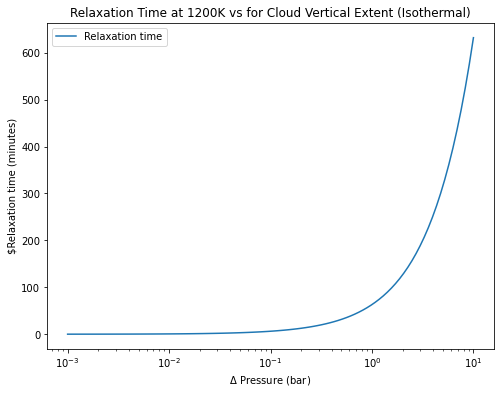

In [37]:
# plot the relaxation time
plt.figure(figsize=(8, 6))
p_grid = np.logspace(-3, 1, 100) * u.bar
t_grid = tau_relaxation(g, Teff, p_grid, cm)
plt.plot(p_grid.to(u.bar), t_grid.to(u.min), label='Relaxation time')
plt.xscale('log')
plt.yscale('linear')
plt.xlabel(r'$\Delta$ Pressure (bar)')
plt.ylabel('$Relaxation time (minutes)')
plt.title('Relaxation Time at 1200K vs for Cloud Vertical Extent (Isothermal)')
plt.legend()

Text(0, 0.5, 'Relaxation time for $\\Delta P = $ 0.2 bar(minutes) (Isothermal)')

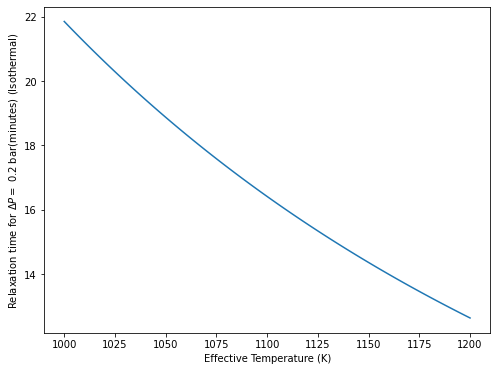

In [38]:
# plot the relaxation time
plt.figure(figsize=(8, 6))
teff_grid = np.linspace(1000, 1200, 100) * u.K
t_grid = tau_relaxation(g, teff_grid, 0.2 *  u.bar, cm)
plt.plot(teff_grid.to(u.K), t_grid.to(u.min), label='Relaxation time')
plt.xscale('linear')
plt.yscale('linear')
plt.xlabel('Effective Temperature (K)')
plt.ylabel(r'Relaxation time for $\Delta P = $ 0.2 bar(minutes) (Isothermal)') 

### Using PT profile from Sonora Bobcat